In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers

In [5]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt

In [6]:
tokenizer = Tokenizer()

data = open('/tmp/sonnets/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [13]:
predictors.shape

(15462, 10)

In [15]:
max_sequence_len

11

In [14]:
label.shape

(15462, 3211)

In [18]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=10))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2()))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 256)           197632    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dense_9 (Dense)              (None, 3211)              3291275   
Total params: 3,843,147
Trainable params: 3,843,147
Non-trainable params: 0
____________________________________________

In [19]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 4s 9ms/step - loss: 6.8974 - accuracy: 0.0228
Epoch 2/100
484/484 [==============================] - 4s 9ms/step - loss: 6.5019 - accuracy: 0.0221
Epoch 3/100
484/484 [==============================] - 4s 9ms/step - loss: 6.4209 - accuracy: 0.0241
Epoch 4/100
484/484 [==============================] - 4s 9ms/step - loss: 6.3249 - accuracy: 0.0273
Epoch 5/100
484/484 [==============================] - 5s 9ms/step - loss: 6.2319 - accuracy: 0.0319
Epoch 6/100
484/484 [==============================] - 4s 9ms/step - loss: 6.1615 - accuracy: 0.0348
Epoch 7/100
484/484 [==============================] - 4s 9ms/step - loss: 6.0905 - accuracy: 0.0382
Epoch 8/100
484/484 [==============================] - 4s 9ms/step - loss: 6.0244 - accuracy: 0.0409
Epoch 9/100
484/484 [==============================] - 4s 9ms/step - loss: 5.9546 - accuracy: 0.0445
Epoch 10/100
484/484 [==============================] - 4s 9ms/step - loss: 5.8781 - accura

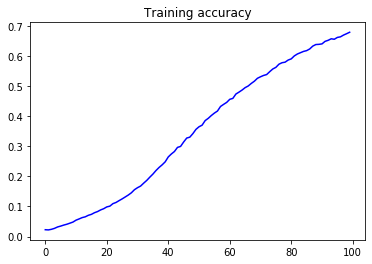

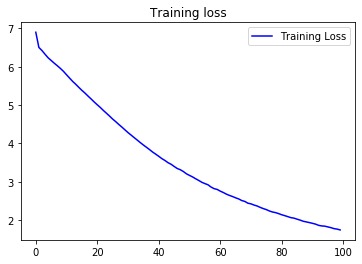

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [21]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope thy moan are dead small days ' ' be in thee her prove being kill me now young days ' did prove thee now so sweet leaves leaves hour survey forsworn fair tongue are more fix'd in you still such twain forsworn thy might hate grow wide small worth ' and prove me show sweet friend forsworn thy tongue confound night doth smother now seen prove sight now increase see thy age by black dost write to thee doth die me trust thee me in all heaven say all the sun itself held one last away away days prove sight
